In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
%matplotlib inline

In [3]:
df_train=pd.read_csv("/home/jupyter/kaggle/melanoma_repo/data/01_raw/train.csv")#.drop()
df_test=pd.read_csv("/home/jupyter/kaggle/melanoma_repo/data/01_raw/test.csv")


In [6]:
print(df_train.columns)
print(df_test.columns)

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target'],
      dtype='object')
Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge'],
      dtype='object')


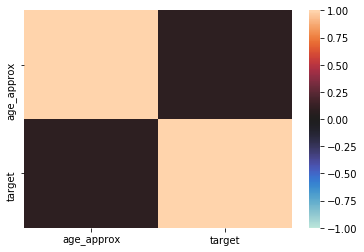

In [3]:
sns.heatmap(df_train.corr(), vmax=1, vmin=-1, center=0)

In [19]:
df_train["age_approx"] /= df_train["age_approx"].max()

In [49]:
df_train_dummies=pd.get_dummies(df_train.drop(columns=["image_name","patient_id"],axis=1))
df_test_dummies=pd.get_dummies(df_test.drop(columns=["image_name","patient_id"],axis=1))
df_train_ext_dummies=pd.get_dummies(df_train_ext.drop(columns=["image_name","patient_id"],axis=1))


In [56]:
df_train_dummies["lower_age"] = (df_train_dummies["age_approx"] <= 40 )

df_train_dummies["middle_age"] = (df_train_dummies["age_approx"] < 75 )& (df_train_dummies["age_approx"] > 40)
df_train_dummies["upper_age"] = (df_train_dummies["age_approx"] >= 75 )


In [2]:
from PIL import Image
img=Image.open("/home/jupyter/kaggle/melanoma_repo/data/01_raw/external_malignant/train/ISIC_6260086.jpg")
img.size



(256, 256)

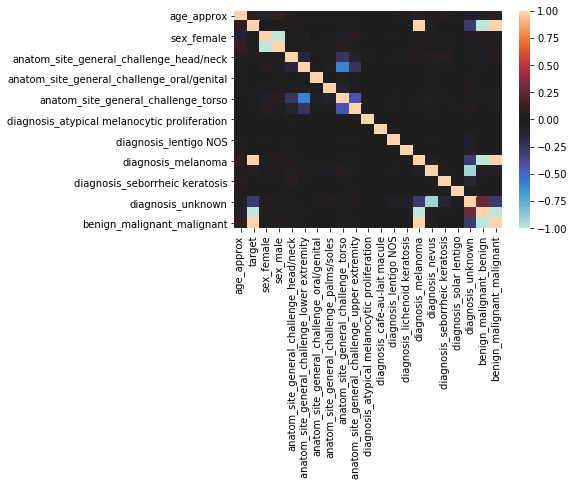

In [12]:
sns.heatmap(df_train_dummies.corr(), vmax=1, vmin=-1, center=0)

In [60]:
df_train_dummies=df_train_dummies * 1

In [62]:
df_train_dummies.corr()

,age_approx,target,sex_female,sex_male,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,...,diagnosis_melanoma,diagnosis_nevus,diagnosis_seborrheic keratosis,diagnosis_solar lentigo,diagnosis_unknown,benign_malignant_benign,benign_malignant_malignant,lower_age,middle_age,upper_age
age_approx,1.000000,0.086388,-0.109827,0.109827,0.057913,0.008315,-0.019266,-0.033694,-0.010406,-0.010347,...,0.086388,0.026336,0.062261,0.017047,-0.071685,-0.086388,0.086388,-0.786653,0.559062,0.460191
target,0.086388,1.000000,-0.028342,0.028864,0.041202,-0.012851,0.006814,-0.003493,-0.018341,0.014856,...,1.000000,-0.057761,-0.008569,-0.001948,-0.284782,-1.000000,1.000000,-0.048215,0.002922,0.100016
sex_female,-0.109827,-0.028342,1.000000,-0.996079,-0.016004,0.053895,-0.014662,-0.017081,-0.066046,0.047833,...,-0.028342,-0.030950,-0.018139,-0.001567,0.041650,0.028342,-0.028342,0.094335,-0.065471,-0.050256
sex_male,0.109827,0.028864,-0.996079,1.000000,0.014857,-0.054094,0.014901,0.017499,0.067736,-0.049554,...,0.028864,0.032639,0.018388,0.001624,-0.043492,-0.028864,0.028864,-0.091529,0.070401,0.051142
anatom_site_general_challenge_head/neck,0.057913,0.041202,-0.016004,0.014857,1.000000,-0.142152,-0.014929,-0.026062,-0.247740,-0.102485,...,0.041202,-0.057708,0.064796,0.005492,0.025601,-0.041202,0.041202,-0.034045,0.014424,0.038119
anatom_site_general_challenge_lower extremity,0.008315,-0.012851,0.053895,-0.054094,-0.142152,1.000000,-0.035776,-0.062453,-0.593671,-0.245590,...,-0.012851,0.024700,-0.019921,-0.003715,-0.014933,0.012851,-0.012851,-0.004704,-0.000536,0.011251
anatom_site_general_challenge_oral/genital,-0.019266,0.006814,-0.014662,0.014901,-0.014929,-0.035776,1.000000,-0.006559,-0.062350,-0.025793,...,0.006814,-0.026430,0.003838,-0.000891,0.022417,-0.006814,0.006814,0.018127,-0.015191,-0.004796
anatom_site_general_challenge_palms/soles,-0.033694,-0.003493,-0.017081,0.017499,-0.026062,-0.062453,-0.006559,1.000000,-0.108842,-0.045026,...,-0.003493,-0.044568,-0.006845,-0.001556,0.045150,0.003493,-0.003493,0.025346,-0.019768,-0.009819
anatom_site_general_challenge_torso,-0.010406,-0.018341,-0.066046,0.067736,-0.247740,-0.593671,-0.062350,-0.108842,1.000000,-0.428011,...,-0.018341,0.060337,-0.015781,-0.006479,-0.045763,0.018341,-0.018341,0.006803,0.003685,-0.019092
anatom_site_general_challenge_upper extremity,-0.010347,0.014856,0.047833,-0.049554,-0.102485,-0.245590,-0.025793,-0.045026,-0.428011,1.000000,...,0.014856,-0.050437,0.002243,0.011312,0.040308,-0.014856,0.014856,0.009324,-0.010035,-0.001579


In [15]:
df_test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [8]:
df_train[(df_train.age_approx >=40)].describe()

,age_approx,target
count,25500.000000,25500.000000
mean,54.557059,0.020039
std,10.875301,0.140137
min,40.000000,0.000000
25%,45.000000,0.000000
50%,55.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


In [42]:
df_test_dummies.describe()

,age_approx,sex_female,sex_male,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity
count,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000,10982.000000
mean,49.525587,0.430432,0.569568,0.052449,0.227736,0.002368,0.009834,0.532417,0.143234
std,14.370589,0.495159,0.495159,0.222942,0.419391,0.048602,0.098684,0.498971,0.350328
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df_test.count()

image_name                       10982
patient_id                       10982
sex                              10982
age_approx                       10982
anatom_site_general_challenge    10631
dtype: int64

In [45]:
df_train_dummies.describe()

,age_approx,target,sex_female,sex_male,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,...,diagnosis_cafe-au-lait macule,diagnosis_lentigo NOS,diagnosis_lichenoid keratosis,diagnosis_melanoma,diagnosis_nevus,diagnosis_seborrheic keratosis,diagnosis_solar lentigo,diagnosis_unknown,benign_malignant_benign,benign_malignant_malignant
count,33058.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,...,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000,33126.000000
mean,48.870016,0.017630,0.482431,0.515607,0.055998,0.254090,0.003743,0.011320,0.508513,0.150426,...,0.000030,0.001328,0.001117,0.017630,0.156765,0.004075,0.000211,0.818813,0.982370,0.017630
std,14.380360,0.131603,0.499699,0.499764,0.229922,0.435355,0.061069,0.105795,0.499935,0.357494,...,0.005494,0.036422,0.033403,0.131603,0.363585,0.063709,0.014535,0.385179,0.131603,0.131603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,60.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df_train_ext=pd.read_csv("/home/jupyter/kaggle/melanoma_repo/data/01_raw/external_malignant/train_concat.csv")

In [51]:
df_train_ext_dummies.describe()

,age_approx,target,sex_female,sex_male,anatom_site_general_challenge_anterior torso,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lateral torso,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_posterior torso,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity
count,37495.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000
mean,50.272303,0.135625,0.477077,0.519045,0.035354,0.072647,0.000372,0.244714,0.003798,0.015300,0.011422,0.447434,0.151588
std,15.025733,0.342394,0.499481,0.499644,0.184675,0.259559,0.019280,0.429923,0.061514,0.122743,0.106261,0.497236,0.358626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df_train.groupby(["age_approx","sex"]).describe()

target                                             
                    count      mean       std  min  25%  50%  75%  max
age_approx sex                                                        
0.0        male       2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
10.0       female    10.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
           male       7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
15.0       female    79.0  0.025316  0.158088  0.0  0.0  0.0  0.0  1.0
           male      53.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
20.0       female   302.0  0.009934  0.099337  0.0  0.0  0.0  0.0  1.0
           male     353.0  0.008499  0.091925  0.0  0.0  0.0  0.0  1.0
25.0       female   979.0  0.004086  0.063822  0.0  0.0  0.0  0.0  1.0
           male     565.0  0.021239  0.144308  0.0  0.0  0.0  0.0  1.0
30.0       female  1398.0  0.005007  0.070609  0.0  0.0  0.0  0.0  1.0
           male     960.0  0.017708  0.131958  0.0  0.0  0.0  0.0  1.0
35.0       female  1542.0  0.009079  0.094882  0.0  0.0  0.0  0.0  1.0
           male    1308.0  0.008410  0.091353  0.0  0.0  0.0  0.0  1.0
40.0       female  1799.0  0.006115  0.077978  0.0  0.0  0.0  0.0  1.0
           male    1777.0  0.007316  0.085242  0.0  0.0  0.0  0.0  1.0
45.0       female  1959.0  0.012251  0.110033  0.0  0.0  0.0  0.0  1.0
           male    2507.0  0.011966  0.108757  0.0  0.0  0.0  0.0  1.0
50.0       female  2082.0  0.008646  0.092601  0.0  0.0  0.0  0.0  1.0
           male    2188.0  0.015996  0.125490  0.0  0.0  0.0  0.0  1.0
55.0       female  1989.0  0.017094  0.129654  0.0  0.0  0.0  0.0  1.0
           male    1835.0  0.016349  0.126847  0.0  0.0  0.0  0.0  1.0
60.0       female  1474.0  0.012890  0.112839  0.0  0.0  0.0  0.0  1.0
           male    1766.0  0.026048  0.159322  0.0  0.0  0.0  0.0  1.0
65.0       female  1179.0  0.027142  0.162565  0.0  0.0  0.0  0.0  1.0
           male    1348.0  0.028190  0.165577  0.0  0.0  0.0  0.0  1.0
70.0       female   580.0  0.020690  0.142466  0.0  0.0  0.0  0.0  1.0
           male    1388.0  0.033141  0.179070  0.0  0.0  0.0  0.0  1.0
75.0       female   330.0  0.048485  0.215115  0.0  0.0  0.0  0.0  1.0
           male     651.0  0.070661  0.256454  0.0  0.0  0.0  0.0  1.0
80.0       female   150.0  0.073333  0.261556  0.0  0.0  0.0  0.0  1.0
           male     269.0  0.092937  0.290885  0.0  0.0  0.0  0.0  1.0
85.0       female    66.0  0.075758  0.266638  0.0  0.0  0.0  0.0  1.0
           male      83.0  0.048193  0.215475  0.0  0.0  0.0  0.0  1.0
90.0       female    60.0  0.133333  0.342803  0.0  0.0  0.0  0.0  1.0
           male      20.0  0.400000  0.502625  0.0  0.0  0.0  1.0  1.0

In [5]:
df_train.isnan("age_approx")

AttributeError: 'DataFrame' object has no attribute 'isnan'

In [7]:
df_train[df_train.age_approx.isnull()].describe()

,age_approx,target
count,0.0,68.0
mean,NaN,0.0
std,NaN,0.0
min,NaN,0.0
25%,NaN,0.0
50%,NaN,0.0
75%,NaN,0.0
max,NaN,0.0


In [10]:
df_train_age_approx = df_train.groupby("age_approx")
df_train_age_approx.cumsum() /df_train_age_approx.sum()

,target
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
33121,NaN
33122,NaN
33123,NaN
33124,NaN


In [19]:
df_train[["age_approx","target"]].groupby(["age_approx","target"]).count()

Empty DataFrame
Columns: []
Index: [(0.0, 0), (10.0, 0), (15.0, 0), (15.0, 1), (20.0, 0), (20.0, 1), (25.0, 0), (25.0, 1), (30.0, 0), (30.0, 1), (35.0, 0), (35.0, 1), (40.0, 0), (40.0, 1), (45.0, 0), (45.0, 1), (50.0, 0), (50.0, 1), (55.0, 0), (55.0, 1), (60.0, 0), (60.0, 1), (65.0, 0), (65.0, 1), (70.0, 0), (70.0, 1), (75.0, 0), (75.0, 1), (80.0, 0), (80.0, 1), (85.0, 0), (85.0, 1), (90.0, 0), (90.0, 1)]